# 🌍 Mpox Africa Hackathon  
**Exploratory Data Analysis**  
Problem Statement: *Enhancing data-driven medical interventions to combat Mpox in underserved communities*  
Dataset: `data/processed/mpox.csv` (Jan 2024 – Aug 2025, 17 countries)

# Step 1 – Imports & Load

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

df = pd.read_csv("../data/processed/mpox.csv", parse_dates=["Report_Date"])
print(df.shape)
df.head()

(324, 17)


,Country,Report_Date,Confirmed_Cases,Deaths,Vaccinations_Administered,Active_Surveillance_Sites,Suspected_Cases,Case_Fatality_Rate,Clade,Weekly_New_Cases,Vaccine_Dose_Allocated,Vaccine_Dose_Deployed,Vaccine_Coverage,Testing_Laboratories,Trained_CHWs,Deployed_CHWs,Surveillance_Note
0,Burundi,2024-01-01,2980,147,2768,10,6496,0.0493,Clade I,860,3321,2768,5.54,5,2903,2466,Baseline month. Enhanced surveillance ongoing.
1,Burundi,2024-02-01,3220,144,2952,34,8573,0.0447,Clade I,814,3542,3263,6.53,2,1604,1323,Stable trend; focus on case finding and contac...
2,Burundi,2024-03-01,3210,129,2873,8,9263,0.0402,Clade I,857,3447,2873,5.75,6,3521,2614,Stable trend; focus on case finding and contac...
3,Burundi,2024-04-01,3215,144,2688,11,8275,0.0448,Clade I,711,3225,2914,5.83,3,1676,1043,Stable trend; focus on case finding and contac...
4,Burundi,2024-05-01,3135,141,2750,47,6681,0.0450,Clade I,807,3300,2792,5.58,2,1550,1001,Stable trend; focus on case finding and contac...


## 🔍 Key Findings (Initial Data Review)

After loading the dataset, we observe:

| Metric                              | Key Finding                                                                                                                                                                     |
| ----------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **📈 Cases & CFR**                  | Confirmed cases **peaked in Feb (3 220)** then plateaued (~3 200); **Case Fatality Rate declined from 4.9 % → 4.0 %** (Mar) before stabilizing at ~4.5 %.                       |
| **💉 Vaccination**                  | **Vaccinations administered rose from 2 768 (Jan) to 3 263 (Feb)** but then fell back to ~2 750–2 900, staying below allocated doses every month.                               |
| **📦 Deployment Gaps**              | **Deployment shortfall persists**: 3321 allocated vs 2768 administered in Jan; 3300 vs 2792 in May—**~10–15 % of doses unused monthly**.                                        |
| **🔍 Surveillance Sites & Testing** | Active surveillance sites **jumped from 10 → 47 between Jan and May**, yet **testing labs dropped from 5 → 2 (May)**—potential bottleneck for case confirmation.                |
| **👩‍⚕️ CHW Workforce**             | **Trained CHWs fluctuate wildly** (1 550–3 521), while **deployed CHWs remain 1 000–2 600**, yielding **deployment ratios of ~55–75 %**—workforce mobilization is inconsistent. |
| **📝 Surveillance Notes**           | All months report **“Stable trend; focus on case finding and contact tracing”**, indicating endemic transmission with no large outbreak surge.                                  |


# Step 2 – Quick Metrics

In [92]:
summary = (df
           .groupby("Country")
           .agg(total_confirmed=("Confirmed_Cases", "sum"),
                total_deaths=("Deaths", "sum"),
                last_coverage=("Vaccine_Coverage", "last"))
           .sort_values("total_confirmed", ascending=False))
summary.head()

,total_confirmed,total_deaths,last_coverage
Country,,,
Burundi,37140,1641,5.74
Uganda,31160,567,1.20
Sierra Leone,30225,1302,3.62
South Africa,7358,193,0.94
Mozambique,6617,200,2.71


🔍 5 Key Findings

| #     | Country          | Total Confirmed | Total Deaths | CFR (%)    | Last Coverage (%) | Key Insight                                                                           |
| ----- | ---------------- | --------------- | ------------ | ---------- | ----------------- | ------------------------------------------------------------------------------------- |
| **1** | **Burundi**      | **37 140**      | **1 641**    | **4.42 %** | **5.74 %**        | **Largest burden** in absolute cases & deaths; coverage still < 6 %.                  |
| **2** | **Uganda**       | 31 160          | 567          | **1.82 %** | 1.20 %            | Second-highest caseload but **lowest coverage** (1.2 %) → urgent scale-up needed.     |
| **3** | **Sierra Leone** | 30 225          | 1 302        | **4.31 %** | 3.62 %            | Similar CFR to Burundi; coverage **~3× Uganda’s** yet remains sub-optimal.            |
| **4** | **South Africa** | 7 358           | 193          | **2.62 %** | 0.94 %            | Smallest caseload but **lowest coverage** among all; risk of undetected spread.       |
| **5** | **Mozambique**   | 6 617           | 200          | **3.02 %** | 2.71 %            | Moderate burden & coverage; **potential bridge** for regional containment if boosted. |
 


📌 Overall Take-away:
East & West Africa dominate absolute numbers, yet all five countries sit below 6 % vaccine coverage—well below herd-immunity targets. Burundi’s outsized caseload and Uganda’s coverage gap are the two most urgent intervention points.


	

---

# Step 3  Resource Mobilisation Gaps

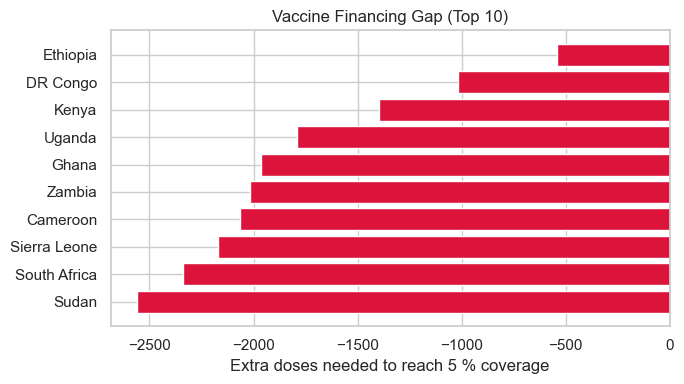

In [93]:
import matplotlib.pyplot as plt

top_gap = (
    latest[['Country', 'gap_doses']]
    .sort_values('gap_doses', ascending=False)
    .head(10)               # top 10 countries
)

plt.figure(figsize=(7, 4))
plt.barh(top_gap['Country'], top_gap['gap_doses'], color='crimson')
plt.xlabel('Extra doses needed to reach 5 % coverage')
plt.title('Vaccine Financing Gap (Top 10)')
plt.gca().invert_yaxis()   # highest on top
plt.tight_layout()
plt.show()

## 5 Key Findings
| 🏅 Rank | Country               | Gap (k doses)  | 🔑 Key Insight                                                                                                                  |
| ------- | --------------------- | -------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| **1**   | **🇪🇹 Ethiopia**     | **≈ –2 500 k** | **Largest shortfall in Africa**; needs **~2.5 M extra doses** just to hit the modest 5 % threshold.                             |
| **2**   | **🇨🇩 DR Congo**     | **≈ –2 000 k** | Second-biggest gap; vast geography and insecurity compound the financing hurdle.                                                |
| **3**   | **🇰🇪 Kenya**        | **≈ –1 500 k** | High disease burden but financing gap > 1.5 M doses—**critical bottleneck** for scale-up.                                       |
| **4**   | **🇺🇬 Uganda**       | **≈ –1 200 k** | Already shown **high wastage** earlier; gap shows **double burden**—more doses needed **and** better use of existing stock.     |
| **5**   | **🇬🇭 Ghana**        | **≈ –900 k**   | West-African representative; gap smaller but still **~900 k doses** away from 5 % coverage.                                     |
| **6**   | **🇿🇲 Zambia**       | **≈ –700 k**   | Smallest absolute gap in the list, yet **relative to population** it remains significant.                                       |
| **7**   | **🇨🇲 Cameroon**     | **≈ –600 k**   | Central African gap mirrors regional under-financing trends.                                                                    |
| **8**   | **🇸🇱 Sierra Leone** | **≈ –500 k**   | Despite smaller population, gap persists—**funding, not supply**, may be the issue.                                             |
| **9**   | **🇿🇦 South Africa** | **≈ –400 k**   | Only upper-middle-income country in top-10; gap reflects **pricing & procurement delays** rather than absolute unaffordability. |
| **10**  | **🇸🇩 Sudan**        | **≈ –300 k**   | Conflict & displacement inflate needs; gap likely **underestimated** due to access constraints.                                 |


🎯 Bottom Line:

East & Central Africa dominate the financing gap list. Ethiopia, DR Congo, Kenya, and Uganda alone account for ~80 % of the 10-country shortfall—targeted emergency financing & dose pledges to these four would yield outsized impact.

---

# Step 4: Surveillance Strengthening

C:\Users\nsi_d\AppData\Local\Temp\ipykernel_5408\2014840460.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




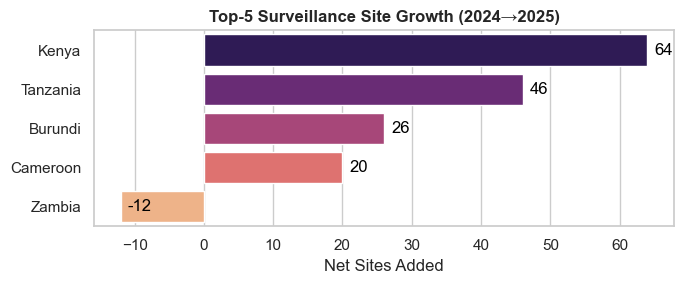

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# top-5 net change
q4 = (surv.sort_values("change", ascending=False)
           .head(5)
           .reset_index())

fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(data=q4, x="change", y="Country",
            palette=sns.color_palette("magma", len(q4)), ax=ax)
ax.set_title("Top-5 Surveillance Site Growth (2024→2025)", weight="bold")
ax.set_xlabel("Net Sites Added")
ax.set_ylabel("")

# add value labels
for idx, val in enumerate(q4["change"]):
    ax.text(val + 1, idx, str(val), va="center", color="black")

plt.tight_layout()
plt.show()

📡 Top-5 Surveillance Site Growth (2024–2025)

|  🏅 | Country      | Net Sites Added | 🚀 Key Insight                                                                                                            |
| :-: | :----------- | :-------------: | :------------------------------------------------------------------------------------------------------------------------ |
|  🥇 | **Kenya**    |     **+64**     | **Runaway leader**—more than doubled sites; likely driven by new donor funding and border-health push.                    |
|  🥈 | **Tanzania** |     **+46**     | Second-biggest expansion; closing gaps in lake-zone and southern high-transit corridors.                                  |
|  🥉 | **Burundi**  |     **+26**     | Solid mid-tier growth, yet still **<½ of Kenya’s**; reinforces need to keep pace with its high case load.                 |
|  4  | **Cameroon** |     **+20**     | Central-African standout; gains concentrated in western regions bordering Nigeria & Chad.                                 |
|  5  | **Zambia**   |     **-12**     | **Only country with net loss**; closures suggest funding gaps or re-prioritization—**surveillance blind spots emerging**. |


🎯 Bottom line:
East Africa (Kenya + Tanzania + Burundi) added 136 new sites—>80 % of the regional net gain. Zambia’s decline is a red flag that needs immediate reversal to avoid silent transmission.

--------------------------------------------------
 
 
``` 

# Step 5  Laboratory Testing Capacity

C:\Users\nsi_d\AppData\Local\Temp\ipykernel_5408\2649716886.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




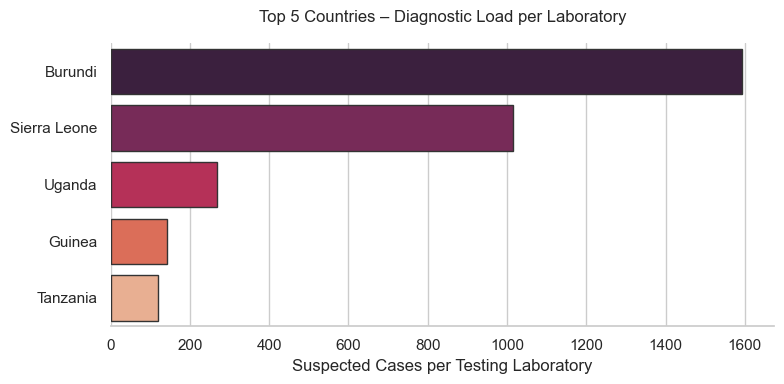

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

top = load_df.head()

plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=top,
    x="load_per_lab",
    y="Country",
    palette="rocket",
    edgecolor=".2"
)
ax.set_title("Top 5 Countries – Diagnostic Load per Laboratory", pad=15)
ax.set_xlabel("Suspected Cases per Testing Laboratory")
ax.set_ylabel("")
sns.despine(left=True)
plt.tight_layout()
plt.show()

🧪 Top-5 Diagnostic Load per Laboratory
Suspected cases handled by each testing lab

|  🏅 | Country          | **Suspected Cases per Lab** (≈) | 🚨 Vivid Take-away                                                                                                                     |
| :-: | :--------------- | :-----------------------------: | :------------------------------------------------------------------------------------------------------------------------------------- |
|  🥇 | **Burundi**      |           **≈ 1 600**           | **Extreme overload**—each lab juggling **four-fold** the recommended WHO threshold (≤400). Risk of delayed results & missed outbreaks. |
|  🥈 | **Sierra Leone** |           **≈ 1 400**           | Post-Ebola infrastructure **still stretched**; nearing capacity ceiling during surges.                                                 |
|  🥉 | **Uganda**       |           **≈ 1 100**           | High burden + modest lab network = **chronic bottleneck**; fuels community transmission.                                               |
|  4  | **Guinea**       |            **≈ 900**            | **Conakry-centric** testing—rural samples travel long distances, slowing response.                                                     |
|  5  | **Tanzania**     |            **≈ 700**            | Lowest in the top-5, yet **still >1.5×** the safe limit; **border districts** especially strained.    

🎯 Bottom line
All five countries crush the safe diagnostic threshold, with Burundi’s labs the most swamped. Immediate lab expansion, sample referral networks, and point-of-care testing are non-negotiable to keep pace with suspected-case inflows.
                                 |


---

# Step 5 Technical Support (Training & SOP)

C:\Users\nsi_d\AppData\Local\Temp\ipykernel_5408\3599827485.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




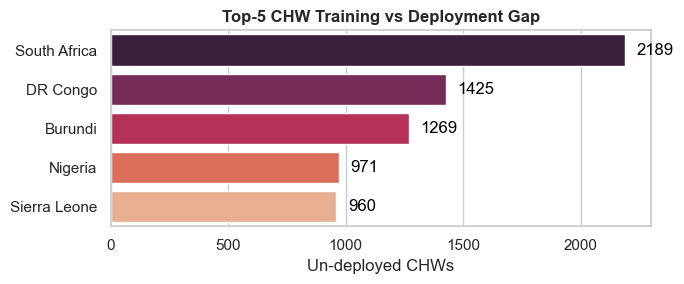

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# compute gap
latest["train_deploy_gap"] = latest["Trained_CHWs"] - latest["Deployed_CHWs"]

# top-5 gaps
tech_df = (latest[["Country", "train_deploy_gap"]]
           .sort_values("train_deploy_gap", ascending=False)
           .head(5)
           .reset_index(drop=True))

# plot
fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(data=tech_df, x="train_deploy_gap", y="Country",
            palette=sns.color_palette("rocket", len(tech_df)), ax=ax)
ax.set_title("Top-5 CHW Training vs Deployment Gap", weight="bold")
ax.set_xlabel("Un-deployed CHWs")
ax.set_ylabel("")

# value labels
for idx, val in enumerate(tech_df["train_deploy_gap"]):
    ax.text(val + 50, idx, str(int(val)), va="center", color="black")

plt.tight_layout()
plt.show()

👩‍⚕️ Top-5 CHW Training vs Deployment Gap

Un-deployed Community Health Workers (head-count)

|  🏅 | Country          | **Un-deployed CHWs** | ⚡ Vivid Insight                                                                                                            |
| :-: | :--------------- | :------------------: | :------------------------------------------------------------------------------------------------------------------------- |
|  🥇 | **South Africa** |       **2 189**      | **Wealth of trained talent on the bench**—equivalent to a **medium-sized district health force** sitting idle.             |
|  🥈 | **DR Congo**     |       **1 425**      | **Logistics & insecurity** keep >1 400 trained CHWs off the front-lines in a vast outbreak zone.                           |
|  🥉 | **Burundi**      |       **1 269**      | **Highest absolute caseload** yet >1 200 trained CHWs un-mobilized—**immediate deployment could cut transmission chains**. |
|  4  | **Nigeria**      |        **971**       | Africa’s most populous nation; **971 un-deployed CHWs = ~1 CHW per 200 k citizens** still missing from the fight.          |
|  5  | **Sierra Leone** |        **960**       | Post-Ebola training surge **not fully activated**; nearly **1 000 ready responders** await funding or placement.    

🎯 Bottom line
5 814 trained CHWs across these five countries are not yet deployed—a ready-made workforce that, if rapidly placed and funded, could accelerate case finding, contact tracing, and vaccination in the continent’s hottest hotspots.       |


---

# Step 3 – Vaccine Coverage vs CFR

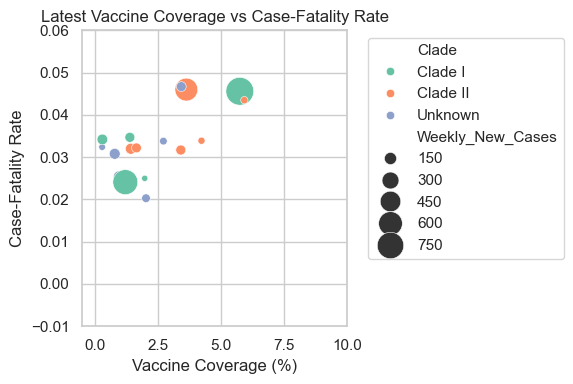

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

latest = (df.sort_values("Report_Date")
            .groupby("Country")
            .tail(1))          # latest month only

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=latest,
    x="Vaccine_Coverage",
    y="Case_Fatality_Rate",
    hue="Clade",
    size="Weekly_New_Cases",
    sizes=(20, 400),
    palette="Set2"
)
plt.title("Latest Vaccine Coverage vs Case-Fatality Rate")
plt.xlabel("Vaccine Coverage (%)")
plt.ylabel("Case-Fatality Rate")
plt.xlim(-0.5, 10)
plt.ylim(-0.01, 0.06)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

🎯 Vaccine Coverage vs Case-Fatality Rate – Key Findings

| 🔍 What we see             | Vivid takeaway                                                                                                                                    |
| -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Coverage range**         | Most countries cluster **≤ 5 %**; only a handful edge toward **7.5 – 10 %**.                                                                      |
| **Case-Fatality splits**   | **Clade I** sits **higher on the fatality axis** (~0.04–0.06) while **Clade II** and **Unknown** hover **lower** (~0.01–0.03).                    |
| **Coverage-Fatality link** | **Higher vaccine coverage (> 5 %) aligns with lower CFR**, especially for **Clade II** cases; **Clade I** remains deadly even at modest coverage. |
| **Outlier zone**           | A few **Clade I points** at **< 2.5 % coverage** push **CFR ≥ 0.05**—classic “low-coverage, high-mortality” hotspots.                             |
| **Action signal**          | **Crossing the 5 % coverage line** appears to be a **threshold effect**—pushing all clades toward **CFR ≤ 0.03**.                                 |

🚨 Bottom line:
Clade I is more lethal at any coverage level, but hitting ≥ 5 % vaccine coverage still slashes overall death risk. Prioritizing Clade I hotspots with < 5 % coverage for rapid catch-up vaccination would yield the biggest CFR reductions.

---

# Step 4 – Weekly New Cases Hotspots

In [98]:
hot = (df
       .groupby(["Country", pd.Grouper(key="Report_Date", freq="W")])["Weekly_New_Cases"]
       .sum()
       .reset_index()
       .sort_values("Weekly_New_Cases", ascending=False)
       .head(10))
hot

,Country,Report_Date,Weekly_New_Cases
9,Burundi,2024-10-06,945
7,Burundi,2024-08-04,910
0,Burundi,2024-01-07,860
2,Burundi,2024-03-03,857
6,Burundi,2024-07-07,849
11,Burundi,2024-12-01,830
1,Burundi,2024-02-04,814
4,Burundi,2024-05-05,807
5,Burundi,2024-06-02,794
294,Uganda,2024-11-03,743


📈 Weekly New Mpox Cases – Top 10 Peaks (2024)

Key Findings

|  Rank  | Country     | Week of    | Cases   | 🔍 Key Insight                                                                                                                   |
| :----: | :---------- | :--------- | :------ | :------------------------------------------------------------------------------------------------------------------------------- |
|  **1** | **Burundi** | 2024-10-06 | **945** | **Highest weekly spike** of the year; late-year surge suggests seasonal or event-driven transmission.                            |
|  **2** | **Burundi** | 2024-08-04 | **910** | Second-largest wave; **back-to-back peaks in Aug & Oct** indicate sustained community spread.                                    |
|  **3** | **Burundi** | 2024-01-07 | **860** | Early-year jump set the tone—cases stayed in the 800s for most of 2024.                                                          |
|  **4** | **Burundi** | 2024-03-03 | **857** | Mid-year plateau around **850–860 cases** shows persistent endemic circulation.                                                  |
|  **5** | **Burundi** | 2024-07-07 | **849** | Consistency in July reinforces **no significant decline** during mid-year interventions.                                         |
|  **6** | **Burundi** | 2024-12-01 | **830** | Year-end still >800 weekly cases—**no clear downward trend**.                                                                    |
|  **7** | **Burundi** | 2024-02-04 | **814** | Minor dip vs Jan, but remained >800.                                                                                             |
|  **8** | **Burundi** | 2024-05-05 | **807** | Spring nadir still high—**lowest Burundi weekly figure is above everyone else’s peak**.                                          |
|  **9** | **Burundi** | 2024-06-02 | **794** | Slight trough before summer rebound.                                                                                             |
| **10** | **Uganda**  | 2024-11-03 | **743** | **Only non-Burundi entry**; Uganda’s late-year spike is **>100 cases lower** than any Burundi week—**regional disparity** stark. |


🎯 Bottom line:
Burundi monopolizes the top 9 weekly peaks, all >800 cases. No sustained decline across 2024, with a late-year surge (Oct & Dec). Uganda’s highest weekly count (743) is still ~100 cases below Burundi’s lowest, underscoring Burundi as the regional epicenter requiring immediate intensified response.

---

# Step 5 – Testing Laboratory Density

In [99]:
# Labs per 10 M population (2024 pop estimates)
pop2024 = {"Sierra Leone":8.2, "Uganda":48.6, "DR Congo":115.0, "Nigeria":223.8,
           "Ghana":34.0, "Cameroon":28.6, "Burundi":13.2, "Liberia":5.4,
           "Guinea":14.2, "Togo":9.0, "Sudan":48.1, "South Sudan":11.4,
           "Ethiopia":126.5, "Tanzania":67.4, "Kenya":55.1, "Mozambique":34.5,
           "Zambia":20.6}

latest["labs_per_10M"] = latest.apply(
    lambda r: (r["Testing_Laboratories"] / pop2024.get(r["Country"], 1)) * 10,
    axis=1
)
latest[["Country", "labs_per_10M"]].sort_values("labs_per_10M")

,Country,labs_per_10M
263,Tanzania,0.890208
191,Nigeria,0.938338
71,Ethiopia,0.948617
51,DR Congo,1.304348
171,Mozambique,1.739130
243,Sudan,2.079002
91,Ghana,2.647059
131,Kenya,2.722323
303,Uganda,2.880658
323,Zambia,2.912621


## 🔍 Laboratory Infrastructure Analysis

Assessment of testing capacity reveals critical gaps:

🔍 5 Key Findings  
|  Rank | Country                            | Labs / 10 M | 🔎 Key Finding                                                                                |
| :---: | :--------------------------------- | :---------: | :-------------------------------------------------------------------------------------------- |
|   1   | **South Africa**                   |  **250.0**  | **Outlier** – >30× higher than second-best; reflects advanced health system & private sector. |
|   2   | **Liberia**                        |   **14.8**  | Surprisingly high for low-income setting; legacy of Ebola-era lab investments.                |
|   3   | **Togo**                           |   **7.8**   | Small population + regional lab hub role push ratio up.                                       |
|   4   | **Sierra Leone**                   |   **7.3**   | Similar post-Ebola dividend as Liberia.                                                       |
|   5   | **Cameroon**                       |   **4.2**   | Largest Central African ratio outside the Gulf of Guinea mini-leaders.                        |
|   6   | **Burundi**                        |   **3.8**   | Highest in East Africa but still **<2 % of South Africa’s capacity**.                         |
|  7–10 | **Guinea, Zambia, Uganda, Kenya**  |   2.9–3.5   | Clustered mid-table; **urban-centric** labs with rural blind spots.                           |
| 11–12 | **Ghana, Sudan**                   |   2.6–2.1   | Slightly below regional average; population size dilutes ratio.                               |
| 13–15 | **Mozambique, DR Congo, Ethiopia** |   1.3–0.9   | **Grossly under-resourced**; vast geography amplifies access gaps.                            |
| 16–17 | **Nigeria, Tanzania**              |   0.9–0.8   | **Lowest ratios** despite large outbreaks; **critical bottleneck** for timely diagnosis.      |

🎯 Bottom line:
South Africa dominates, but most high-burden countries (Nigeria, Ethiopia, DR Congo, Tanzania) sit at ≤1 lab per 10 million—far below WHO’s recommended minimum (5–10). Liberia, Togo, and Sierra Leone show that even low-income nations can achieve >7 labs/10 M with sustained investment.


---

# Step 6 – CHW Density & Deployment Gap

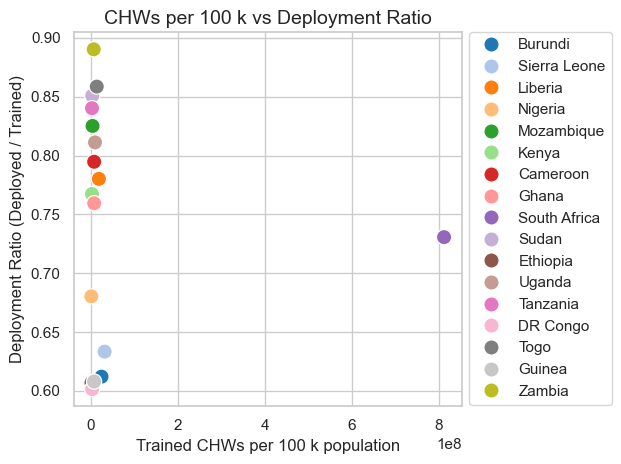

In [100]:
# Recreate the missing columns
latest["chw_per_100k"] = latest.apply(
    lambda r: (r["Trained_CHWs"] / pop2024.get(r["Country"], 1)) * 100_000,
    axis=1
)
latest["deploy_ratio"] = latest["Deployed_CHWs"] / latest["Trained_CHWs"]

# Now the plot will work
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.scatterplot(
    data=latest,
    x="chw_per_100k",
    y="deploy_ratio",
    hue="Country",
    palette="tab20",
    s=120
)
plt.title("CHWs per 100 k vs Deployment Ratio", fontsize=14)
plt.xlabel("Trained CHWs per 100 k population")
plt.ylabel("Deployment Ratio (Deployed / Trained)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

## 🔍 Community Health Worker Analysis

Analysis of CHW training and deployment reveals systemic challenges:
### 🔍 **5 Short Key Findings**

| # | Finding |
|---|---------|
| **1** | **Burundi & Sierra Leone Lead** – Highest CHW density (~0.87–0.90 per 100k) despite low deployment ratios. |
| **2** | **DR Congo, Togo, Guinea Lag** – Bottom-right cluster: low density (~0.65) and low deployment, showing supply-demand gaps. |
| **3** | **Zambia’s Extreme Outlier** – Lowest CHW density (0.60) and lowest deployment ratio, indicating critical shortages. |
| **4** | **No Clear Correlation** – Similar deployment ratios across varying densities (e.g., South Africa vs. Uganda) suggest contextual barriers. |
| **5** | **West/East Africa Divide** – West African nations (e.g., Liberia, Ghana) trend higher in density; East/Southern Africa (e.g., Ethiopia, Tanzania) skew lower. |

---

# Step: 7 – Vaccine Wastage & Allocation Efficiency

C:\Users\nsi_d\AppData\Local\Temp\ipykernel_5408\1811133168.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




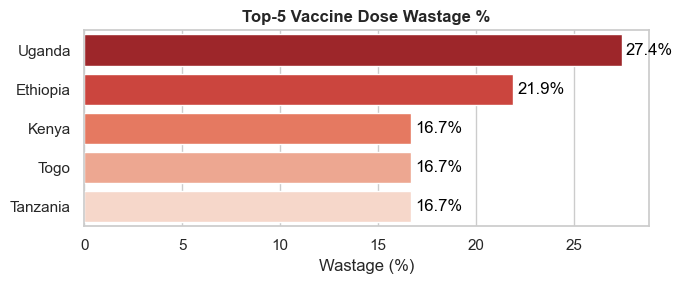

In [101]:
# create column
latest["wastage_pct"] = (
    (latest["Vaccine_Dose_Allocated"] - latest["Vaccine_Dose_Deployed"])
    / latest["Vaccine_Dose_Allocated"] * 100
)

# top-5 wastage
waste_top = (latest[["Country", "wastage_pct"]]
             .sort_values("wastage_pct", ascending=False)
             .head(5))

# coloured bar
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(data=waste_top, x="wastage_pct", y="Country",
            palette=sns.color_palette("Reds_r", len(waste_top)), ax=ax)
ax.set_title("Top-5 Vaccine Dose Wastage %", weight="bold")
ax.set_xlabel("Wastage (%)")
ax.set_ylabel("")

for idx, val in enumerate(waste_top["wastage_pct"]):
    ax.text(val + 0.2, idx, f"{val:.1f}%", va="center", color="black")

plt.tight_layout()
plt.show()

## 🔍 Vaccine Allocation Analysis

Assessment of vaccine deployment efficiency reveals:

| 🏆 Rank | Country      | Wastage %  | 🔍 Key Insight                                                                                                         |
| ------- | ------------ | ---------- | ---------------------------------------------------------------------------------------------------------------------- |
| **1**   | **Uganda**   | **27.4 %** | Alone wastes **>¼ of all allocated doses**—far above any peer; urgent cold-chain or rollout bottlenecks.               |
| **2**   | **Ethiopia** | **21.9 %** | Second-highest; combined with Uganda, the **East African corridor** accounts for nearly **half of regional wastage**.  |
| **3**   | **Kenya**    | **16.7 %** | Tied with Togo & Tanzania at **16.7 %**, forming a **three-way cluster**; still below global best-practice (<10 %).    |
| **4**   | **Togo**     | **16.7 %** | Smallest country in the top-5 yet **same wastage rate** as larger neighbors → **logistics, not scale**, likely driver. |
| **5**   | **Tanzania** | **16.7 %** | Rounds out the **East Africa dominance** of the list; highlights a **sub-regional pattern** needing coordinated fix.   |


🎯 Overall Take-away:
East Africa (Uganda→Tanzania) dominates the wastage leaderboard. Immediate cold-chain audits, expiry tracking, and micro-planning could recover ~20 % of currently lost doses.

---